# Projeto de Machine Learning - Método Regressão Linear 

- A empresa **vende roupas onlines** e também **fornece serviços** de consultoria em estilo e vestuário.

- Clientes procuram na loja sessões/reuniões com um estilista pessoal e podem decidir encomendar roupas que eles desejam usando um aplicativo móvel ou um site;

- A empresa está tentando decidir se deve concentrar seus esforços em sua experiência em **aplicativos móveis ou em seu site**. Não existe recurso para os investimentos, você foi contratado para ajudá-los a descobrir isso! Vamos começar!

In [1]:
### Bibliotecas utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Etapas do projeto
- Coleta de dados
- Análise de dados
- Criação de modelos
- Validação de modelos
- Apresentação dos resultados


# 1. Coleta de dados

Vamos pensar que a Empresa de forneceu um arquivo com seus dados:

Arquivo: https://www.kaggle.com/srolka/ecommerce-customers 
- Informações pessoais do cliente:
    - **Nome**
    - **Email**
    - **Avatar**
- Informações sobre a interação do cliente com a loja 
    - **Avg. Session Length**: Tempo médio das sessões de consultoria de estilo na loja.
    - **Time on App**: Tempo médio gasto no app em minutos.
    - **Time on Website**: Tempo médio gasto no site em minutos.
    - **Lenght of Membership**: Há quantos anos o cliente é membro.
    - **Yearly Amount Spent**: Valor gasto anualmente

In [2]:
## Leitura dos dados
path= 'C:/Users/William Cararo\Videos/Curso - Data Science/módulo 11 - machine learning/Material+de+apoio/'
clientes = pd.read_csv(path+'Ecommerce Customers.csv')
clientes.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
clientes.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [4]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


# 2.Análise de dados - Exploratória

**Overview**: Para uma análise intuitiva e de forma mais rápida para termos um pré diagnóstico o próprio pandas profiling nos ajuda nessa **tarefa**, nos dando algumas informações de correlação e interações indicando uma possível causalidade.

In [5]:
from pandas_profiling import ProfileReport

In [6]:
relatorio = ProfileReport(clientes, title = 'Relatório Exploratório do E-commerce')
#relatorio.to_file('relatorio_ecommerce.html') # Para montar um arquivo html
relatorio

### Insights 
- Pessoas que passam necessariamente mais tempo no site não gastam mais!  
- Pessoas que **gastam mais tempo no app** tem uma tendência para **gastar mais**!
- Pessoas que são clientes a algum tempo NÃO gastam mais.
- Pessoas que tem **maior tempo de membro** tem uma tendência a gastar mais.

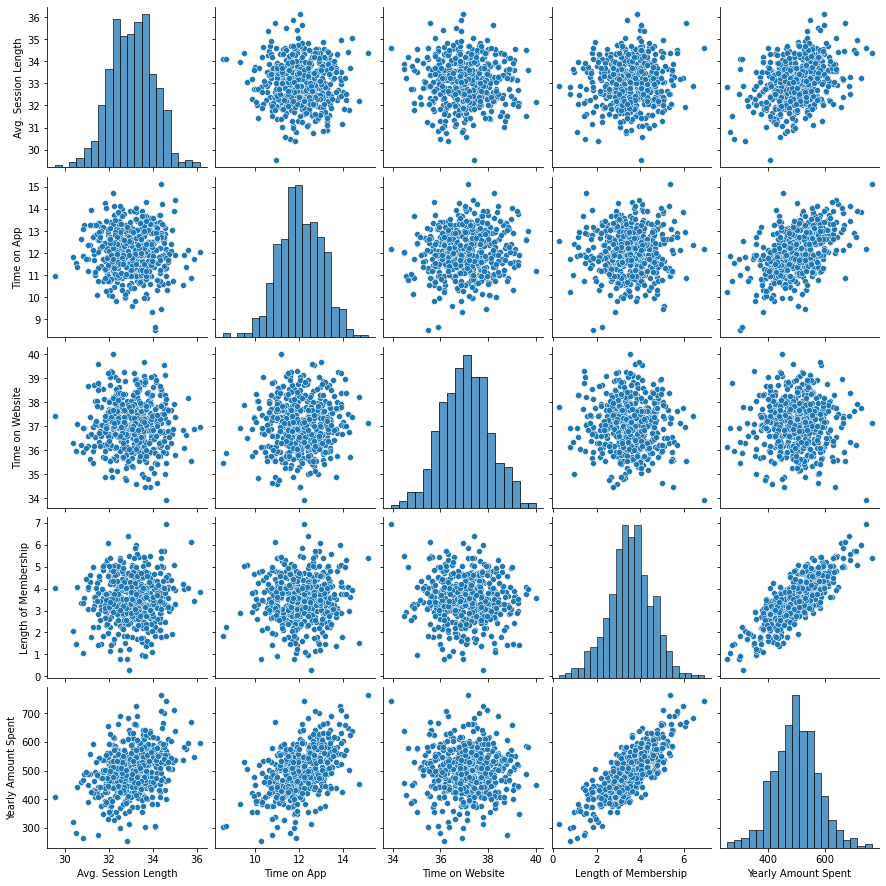

In [7]:
# Análise Geral para análise exploratória.
sns.pairplot(clientes)

**Qual a relação entre o usuário passa mais tempo no site com o valor gasto?**
Podemos ver com o gráfico que estas duas variaveis não estão diretamente relacionadas, ou seja, não necessariamente o usuário que passa mais tempo no site acaba gastando mais. Os pontos estão bastante dispersos da base.

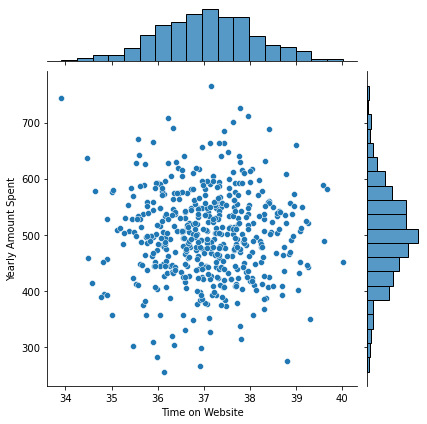

In [8]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=clientes)

**Existe relação entre as pessoas que ficam mais tempo no app com o gasto anual?**
Podemos ver que existe uma certa relação linear, fraca/média. Pois a variância entre os dados é grande. Nesse sentido existe uma certa tendência entre o gasto anual com o consumidor passar mais tempo no app.

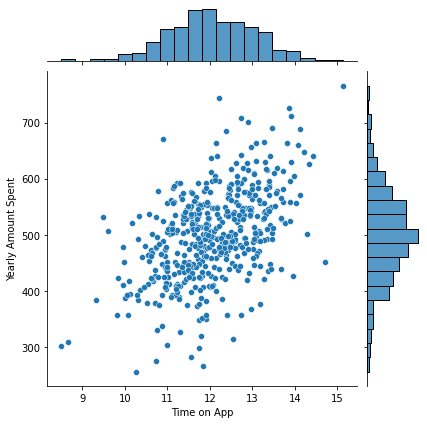

In [9]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=clientes)


**Pessoas que usam mais tempo o app, são membros mais antigos?**
Podemos ver os pontos de intersecções que ele acaba se concentrando. Não indicando relação direta com o tempo como membro.

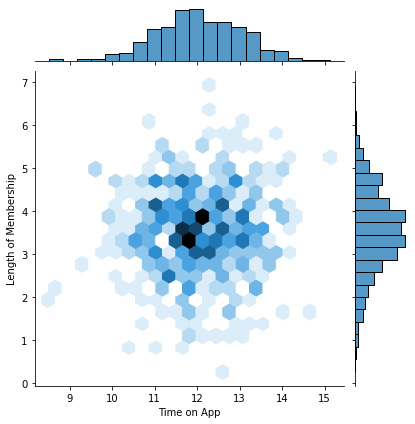

In [10]:
sns.jointplot(x='Time on App', y='Length of Membership', data=clientes, kind='hex')

(<seaborn.axisgrid.JointGrid at 0x113ea6277c0>,)

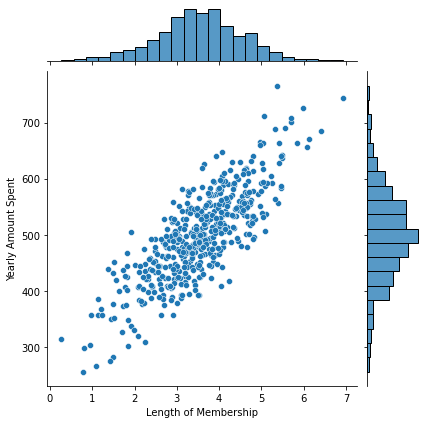

In [11]:
sns.jointplot(x='Length of Membership', y='Yearly Amount Spent', data=clientes),


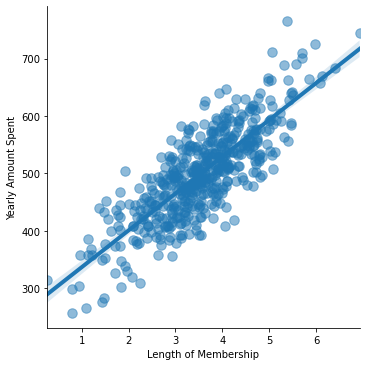

In [12]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent',
          palette='rocket',
          data=clientes,
          scatter_kws={'s':90,'alpha':0.5},
          line_kws={'lw':4})

# **3.Criação do modelo de ML**

Nessa etapa devo desmenbrar meu dataset de acordo com as variáveis independentes(entrada: features) e dependentes(saída: "resultado"). Irei treinar o modelo em base do modelo Linear Regression da biblioteca sklearn para o teste / modelo. 

**Etapas:**
- Instanciar meu objeto x e y.
- importar a biblioteca e montar o modelo train_test_split / Particionar.
- Testa o modelo.
- Validar o modelo e ver os resultados dos coeficientes / erros da predição.

In [13]:
clientes.head(2)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933


In [14]:
x = clientes[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y = clientes['Yearly Amount Spent']


**Dividir modelo entre treino e teste.**

In [15]:
from sklearn.model_selection import train_test_split #train test particiona o vetor baseado no parametro que eu coloco.

In [16]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=40) # Random state é somente para embaralhar os dados, número tanto faz.


In [17]:
print('X_train: ',x_train.shape, 'x_train: ',x_test.shape)
print('y_train:', y_train.shape, 'y_test: ',y_test.shape)

X_train:  (350, 4) x_train:  (150, 4)
y_train: (350,) y_test:  (150,)


In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lr = LinearRegression()

In [20]:
lr.fit(x_train,y_train)

LinearRegression()

In [21]:
lr.coef_

array([25.28771571, 39.17178274,  0.32166787, 61.2484008 ])

In [22]:
predito = lr.predict(x_test)


# 4.Validação do Modelo

Text(0, 0.5, 'predito')

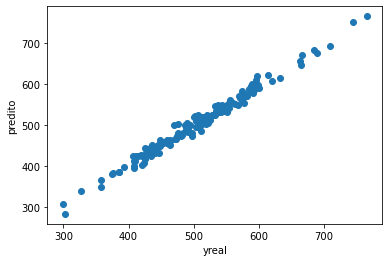

In [23]:
plt.scatter(y_test,predito,)
plt.xlabel('yreal')
plt.ylabel('predito')

In [24]:
lr.score(x_test,y_test)

0.98319158723619

In [25]:
from sklearn import metrics

In [26]:
# printar os outros erros
print('MAE: ',metrics.mean_absolute_error(y_test, predito))
print('MSE: ',metrics.mean_squared_error(y_test, predito))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test, predito)))
print('R²: ', metrics.r2_score(y_test,predito))
# o Erro seria em valores, ou seja, valores reais(dinheiro) da variancia dos dados.

MAE:  8.414860085645259
MSE:  109.27910351983392
RMSE:  10.45366459763436
R²:  0.98319158723619


In [27]:
def adjusted_R(y, predito, N):
    adj_r = (1 - ((1 - metrics.r2_score(y, predito)) * (len(y) - 1)) / (len(y) - N - 1))   
    return adj_r
print('R-adjust:', adjusted_R(y_test, predito, x_train.shape[1]))

R-adjust: 0.982727906884085


# 5.Conclusões finais.
O modelo se mostrou com uma boa performance, com o R² de 0,98, ou seja, tem uma boa explicação. Se formos analisar o erro desse modelo,a maior parte fica entre 5 e 10 reais, ou seja, pelo valor ticket médio estar entre 450&600 $ considero que é variancia de erro baixa, mostrando uma boa assertividade do modelo.

<IPython.core.display.Javascript object>


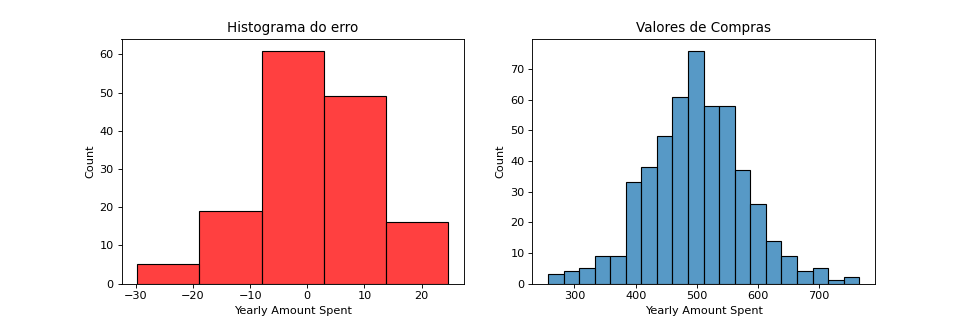

Text(0.5, 1.0, 'Valores de Compras')

In [28]:
%matplotlib notebook
absolute_error = y_test-predito
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(12,4))
sns.histplot(absolute_error, bins=5, ax=axis1,color='red').set_title('Histograma do erro')
sns.histplot(clientes['Yearly Amount Spent'], ax=axis2).set_title('Valores de Compras')
# 

In [29]:
coef = pd.DataFrame(lr.coef_, x.columns, columns=['Coefs'])
coef

,Coefs
Avg. Session Length,25.287716
Time on App,39.171783
Time on Website,0.321668
Length of Membership,61.248401


 Q1) Qual a variável mais importante do meu modelo? 
- A empresa ganha mais quando fideliza seu cliente, quanto mais tempo em unidade de fidelização maior a receita anual em 61.67 dólares. Sendo essa a principal váriavel que a empresa deve tomar cuidado com maior impacto na receita.
- A cada aumento em uma unidade no tempo médio das sessões de consultoria com o estilista, temos um aumento de 25.98 dólares gasto no ano;

Q2) É melhor eu investir no site ou no aplicativo?
- A cada minuto gasto em média no aplicativo, aumentamos a receita anual em 38.59 dólares;
- O tempo no site reflete muito pouco na receita anual
